# SML CT3 MPA

### Data_set:
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

1. id = listing ID
2. name = name of the listing
3. host_id = host ID
4. host_name = name of the host
5. neighbourhood_group = location
6. neighbourhood = area
7. latitude = latitude coordinates
8. longitude = longitude coordinates
9. room_type = listing space type
10. price = price in dollars (Target variable)
11. minimum_nights = amount of nights minimum
12. number_of_reviews = number of reviews
13. last_review = latest review
14. reviews_per_month = number of reviews per month
15. calculated_host_listings_count = amount of listing per host
16. availability_365 = number of days when listing is available for booking

### 1.	 Read the dataset (tab, csv, xls, txt, inbuilt dataset)






In [1]:
# Kindly change the below cells from markdown to code and execute it

In [2]:
import pandas as pd

import csv

with open("new_york_city_air.csv","r")as file:

    reader=csv.reader(file)
    
df=pd.read_csv("new_york_city_air.csv")

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,12598446,Spacious 4bdrm next to CentralPk,5162192,Amy,Manhattan,Upper West Side,40.79860,-73.96229,Entire home/apt,275,30,4,09-01-2019,0.15,12,199
1,13585495,Great room in amazing Little Italy location!,15960548,Nathan,Manhattan,Little Italy,40.71955,-73.99707,Private room,110,2,1,14-09-2016,0.03,1,0
2,27761683,"Clean Cozy Room, Queens-5 min walk to subway (...",199524563,Bei,Queens,Rego Park,40.72678,-73.86218,Private room,55,2,25,22-06-2019,2.37,3,38
3,14200678,Charming 1 bdr apt. just 17 mins from MANHATTAN!,557669,Ryan,Queens,Woodside,40.74663,-73.89653,Entire home/apt,96,2,1,08-08-2016,0.03,1,0
4,24540935,A Beach House in Brooklyn,51068857,Derek,Brooklyn,Bedford-Stuyvesant,40.68297,-73.95251,Private room,80,1,0,NaN,NaN,1,5


In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
matplotlib.rcParams['font.family'] = "Arial"
import collections
import itertools
import scipy.stats as stats
from scipy.stats import norm
from scipy.special import boxcox1p
import statsmodels
import statsmodels.api as sm
#print(statsmodels.__version__)
from sklearn.preprocessing import scale, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.utils import resample
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

### 2.	Data Understanding
#### Summarize important observations from the data set (5 Marks)
Some pointers which would help you, but don’t be limited by these

a.	What are the number of rows; no. & types of variables (continuous, categorical etc.)

b.	Calculate five point summary for numerical variables

c.	Summarize observations for categorical variables – no. of categories, % observations in each category


###### Dimensions of the data

In [4]:
df.shape

(1054, 16)

###### Types of the data attributes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1054 non-null   int64  
 1   name                            1053 non-null   object 
 2   host_id                         1054 non-null   int64  
 3   host_name                       1054 non-null   object 
 4   neighbourhood_group             1054 non-null   object 
 5   neighbourhood                   1054 non-null   object 
 6   latitude                        1054 non-null   float64
 7   longitude                       1054 non-null   float64
 8   room_type                       1054 non-null   object 
 9   price                           1054 non-null   int64  
 10  minimum_nights                  1054 non-null   int64  
 11  number_of_reviews               1054 non-null   int64  
 12  last_review                     84

<span style='font-family:verdana;color:navy;;font-style:italic'>Above data has 7 numerical columns:</span>
<span style='font-family:verdana;color:navy;;font-style:italic'><b>price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365</b></span>

<span style='font-family:verdana;color:blue;;font-style:italic'>Above data has 9 Categorical columns:</span>
<span style='font-family:verdana;color:blue;;font-style:italic'><b>id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type</b></span>

#### Remove unnecessary columns

In [6]:
df.drop(['id', 'host_id', 'host_name', "last_review","name","neighbourhood"],axis=1,inplace=True)

In [7]:
cat_cols = df.describe(include="object").columns
cat_cols

Index(['neighbourhood_group', 'room_type'], dtype='object')

In [8]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        'Ratio': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print('##########################################')
    if plot:
        plt.figure(figsize=(12,6))
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

               neighbourhood_group      Ratio
Manhattan                      449  42.599620
Brooklyn                       431  40.891841
Queens                         130  12.333966
Bronx                           34   3.225806
Staten Island                   10   0.948767
##########################################


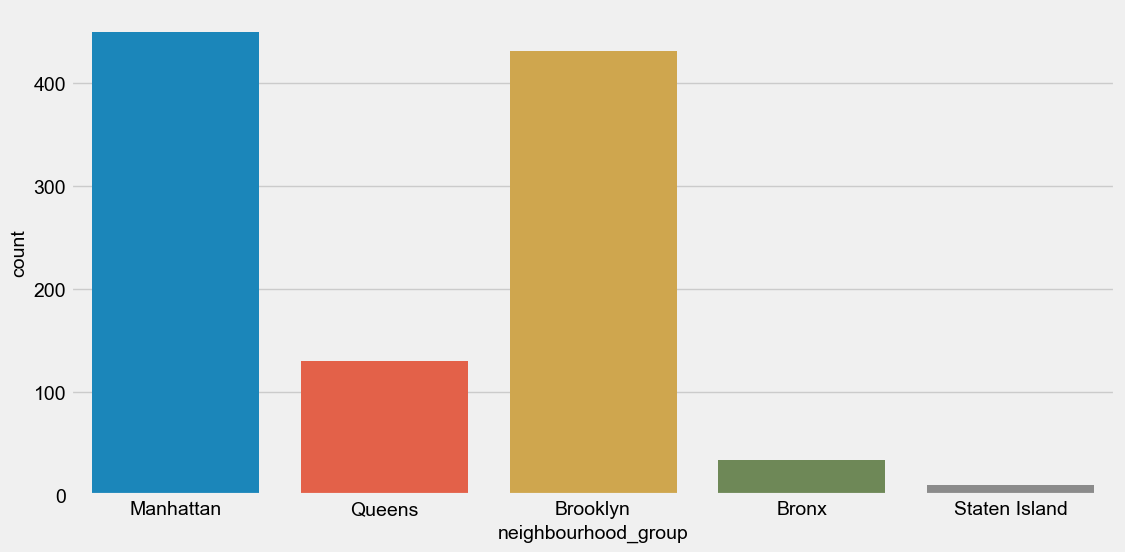

                 room_type     Ratio
Entire home/apt        539  51.13852
Private room           482  45.73055
Shared room             33   3.13093
##########################################


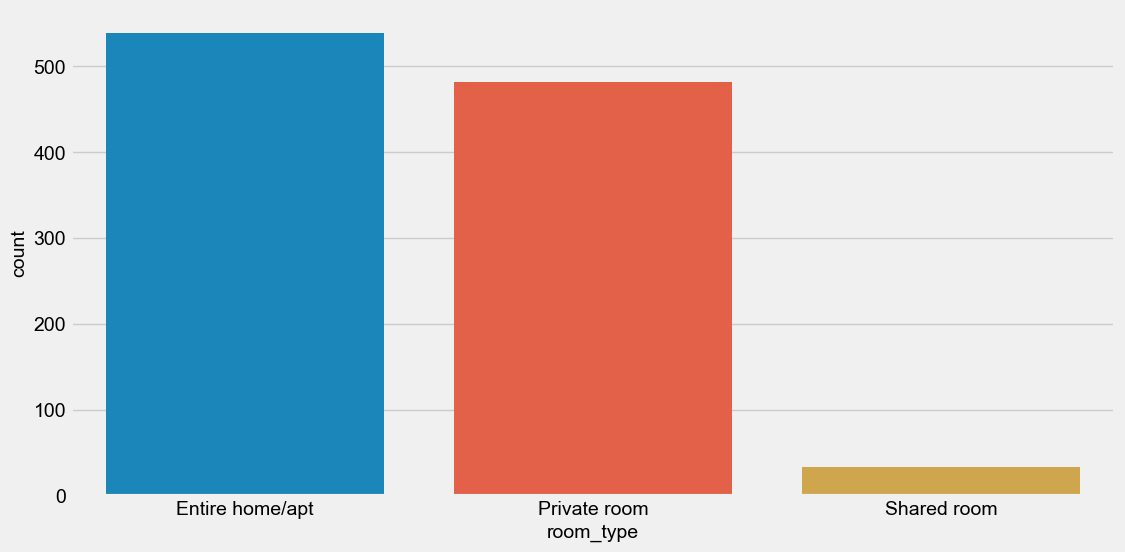

In [9]:
for col in cat_cols:

    cat_summary(df, col, plot=True)

In [10]:
num_cols = df.describe(exclude="object").columns

In [11]:
num_cols = [col for col in num_cols if col not in ["price"]]

In [12]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count    1054.000000
mean       40.728377
std         0.056092
min        40.499790
5%         40.649048
10%        40.667156
20%        40.684384
30%        40.695016
40%        40.710604
50%        40.721665
60%        40.735824
70%        40.754331
80%        40.767662
90%        40.804660
95%        40.831454
99%        40.868597
max        40.898730
Name: latitude, dtype: float64


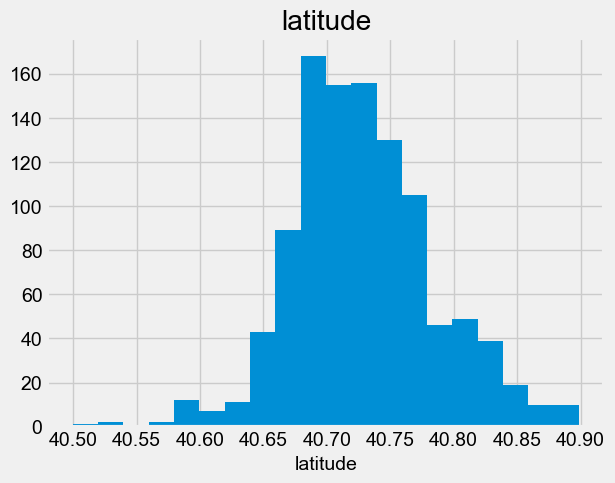

count    1054.000000
mean      -73.951802
std         0.049034
min       -74.240840
5%        -74.002941
10%       -73.997010
20%       -73.988776
30%       -73.979272
40%       -73.964878
50%       -73.956930
60%       -73.949372
70%       -73.940939
80%       -73.926708
90%       -73.903400
95%       -73.859742
99%       -73.776000
max       -73.731700
Name: longitude, dtype: float64


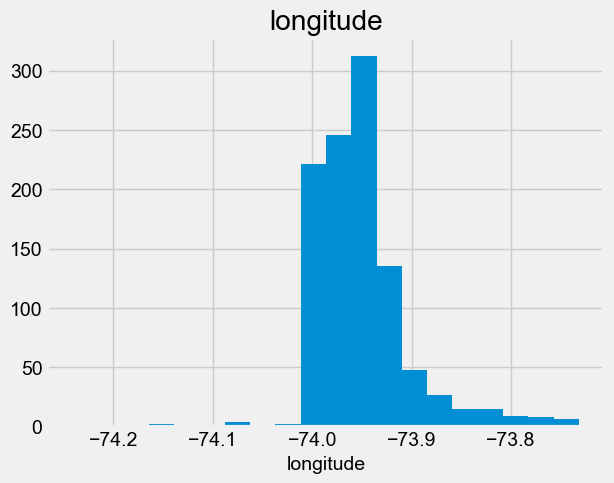

count    1054.000000
mean        8.002846
std        34.580253
min         1.000000
5%          1.000000
10%         1.000000
20%         1.000000
30%         2.000000
40%         2.000000
50%         3.000000
60%         3.000000
70%         4.000000
80%         6.000000
90%        29.700000
95%        30.000000
99%        57.880000
max       999.000000
Name: minimum_nights, dtype: float64


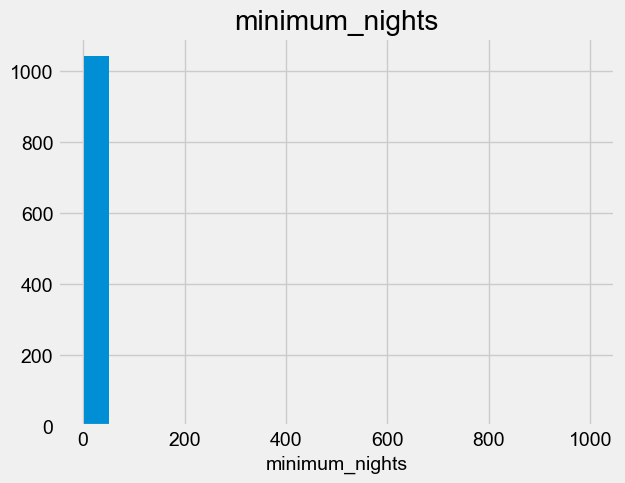

count    1054.000000
mean       24.620493
std        49.178939
min         0.000000
5%          0.000000
10%         0.000000
20%         1.000000
30%         2.000000
40%         3.000000
50%         6.000000
60%        10.000000
70%        19.000000
80%        33.000000
90%        68.700000
95%       122.350000
99%       255.700000
max       426.000000
Name: number_of_reviews, dtype: float64


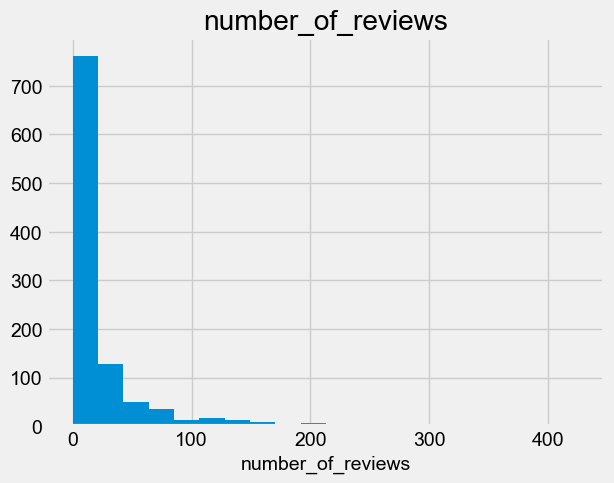

count    844.000000
mean       1.347690
std        1.675154
min        0.020000
5%         0.040000
10%        0.060000
20%        0.150000
30%        0.250000
40%        0.420000
50%        0.730000
60%        1.000000
70%        1.580000
80%        2.352000
90%        3.531000
95%        4.678500
99%        7.418300
max       15.320000
Name: reviews_per_month, dtype: float64


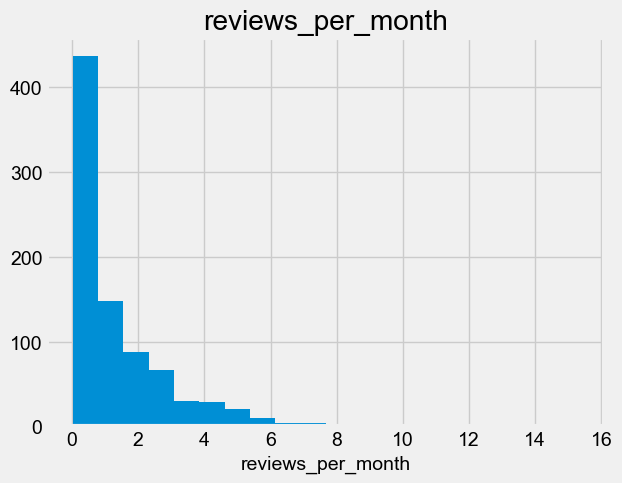

count    1054.000000
mean        6.959203
std        31.266268
min         1.000000
5%          1.000000
10%         1.000000
20%         1.000000
30%         1.000000
40%         1.000000
50%         1.000000
60%         1.000000
70%         2.000000
80%         3.000000
90%         7.000000
95%        14.350000
99%       173.170000
max       327.000000
Name: calculated_host_listings_count, dtype: float64


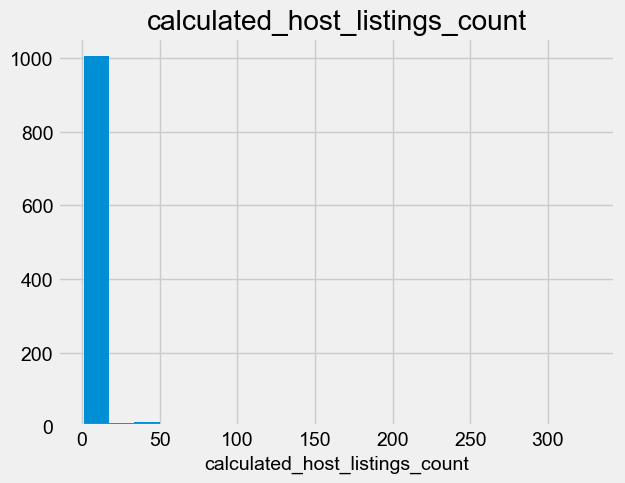

count    1054.000000
mean      111.572106
std       129.835933
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         7.200000
50%        43.500000
60%        94.800000
70%       179.000000
80%       267.000000
90%       330.000000
95%       353.700000
99%       365.000000
max       365.000000
Name: availability_365, dtype: float64


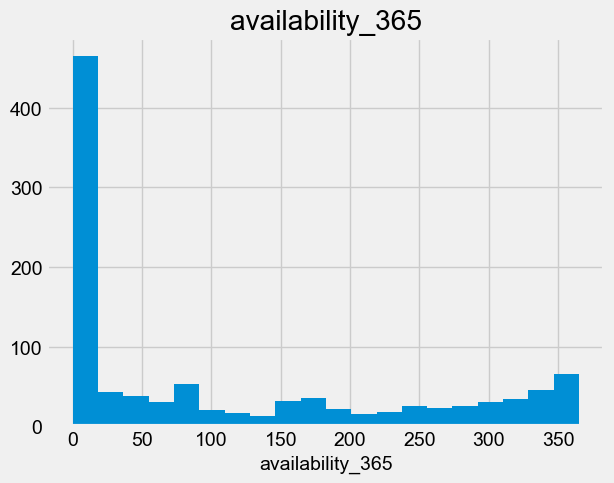

In [13]:
for col in num_cols:
    num_summary(df, col, plot=True)

In [14]:
def target_summary_with_cat(dataframe, target, categorical_col, plot=False):
    print(pd.DataFrame({'TARGET_MEAN': dataframe.groupby(categorical_col)[target].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=categorical_col, y=target, data=dataframe)
        plt.show(block=True)

                     TARGET_MEAN
neighbourhood_group             
Bronx                  85.235294
Brooklyn              125.758701
Manhattan             197.253898
Queens                 84.907692
Staten Island         107.800000




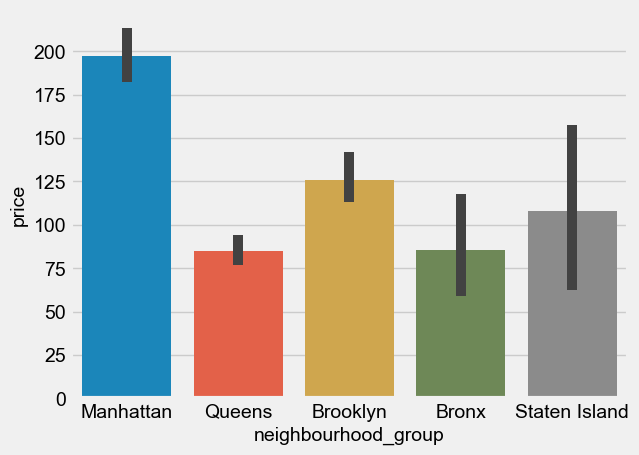

                 TARGET_MEAN
room_type                   
Entire home/apt   205.521336
Private room       91.112033
Shared room        93.666667




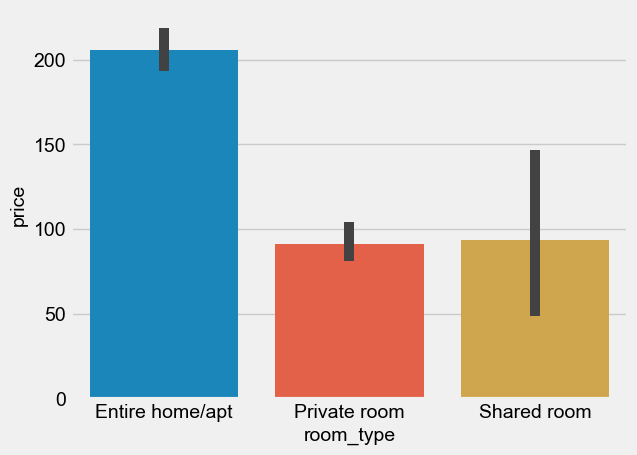

In [15]:
for col in cat_cols:
    target_summary_with_cat(df, 'price', col, plot=True)

In [16]:
def target_summary_with_num(dataframe, target, numerical_col, plot=False):
    print(pd.DataFrame({numerical_col+'_mean': dataframe.groupby(target)[numerical_col].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=target, y=numerical_col, data=dataframe)
        plt.show(block=True)

In [17]:
for col in num_cols:
    target_summary_with_cat(df, 'price', col, plot=False)

          TARGET_MEAN
latitude             
40.49979        110.0
40.53871        180.0
40.53939        299.0
40.57688        130.0
40.57753         80.0
...               ...
40.88437         32.0
40.88777         70.0
40.89466         50.0
40.89702        289.0
40.89873         34.0

[1017 rows x 1 columns]


           TARGET_MEAN
longitude             
-74.24084        110.0
-74.16966        180.0
-74.15443         43.0
-74.15389        299.0
-74.12261        140.0
...                ...
-73.75116         25.0
-73.74904         55.0
-73.73529        350.0
-73.73416        120.0
-73.73170         70.0

[1004 rows x 1 columns]


                TARGET_MEAN
minimum_nights             
1                146.472325
2                146.980000
3                159.515625
4                141.301370
5                148.370370
6                153.222222
7                 98.615385
8                119.500000
9                 75.000000
10               145.416667
12                77.0000

### 3.	Data Preparation
#### Check for defects in the data. Perform necessary actions to ‘fix’ these defects (5 Marks)
Some pointers which would help you, but don’t be limited by these

a.	Do variables have missing/null values?

b.	Do variables have outliers?

c.	Is the data normally distributed? Is it a defect? Why or why not?


In [18]:
null=df.isnull().sum()
null[null>0]

reviews_per_month    210
dtype: int64

In [19]:
df["reviews_per_month"] = df.groupby(["neighbourhood_group"])["reviews_per_month"].transform(lambda x:x.fillna(x.mean()))

<span style='font-family:verdana;color:navy;;font-style:italic'><b>last_review and reviews_per_month has more null values</b></span>


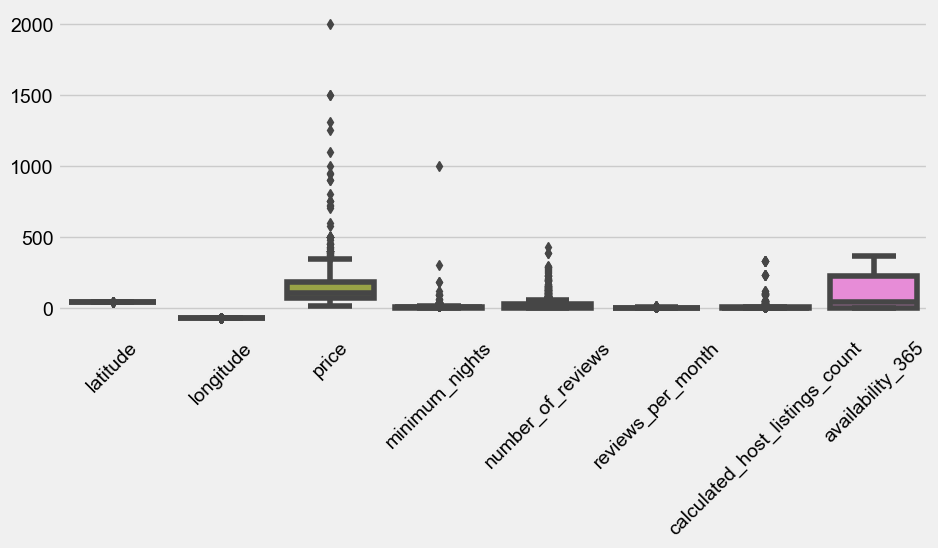

In [20]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df.select_dtypes(exclude="object"))
plt.xticks(rotation=45)
plt.show()

<span style='font-family:verdana;color:navy;;font-style:italic'><b>price, minimum_nights, number_of_reviews,  calculated_host_listings_count are having Outliers</b></span>


###### Check Skewness and Kurtosis

In [21]:
df.select_dtypes(exclude="object").skew()

latitude                           0.257034
longitude                          0.987835
price                              4.981156
minimum_nights                    23.322090
number_of_reviews                  3.713112
reviews_per_month                  2.698323
calculated_host_listings_count     8.233808
availability_365                   0.759888
dtype: float64

<span style='font-family:verdana;color:navy;;font-style:italic'><b>minimum_nights and calculated_host_listings_count has considerable outliers as the curves are positively skewed</b></span>

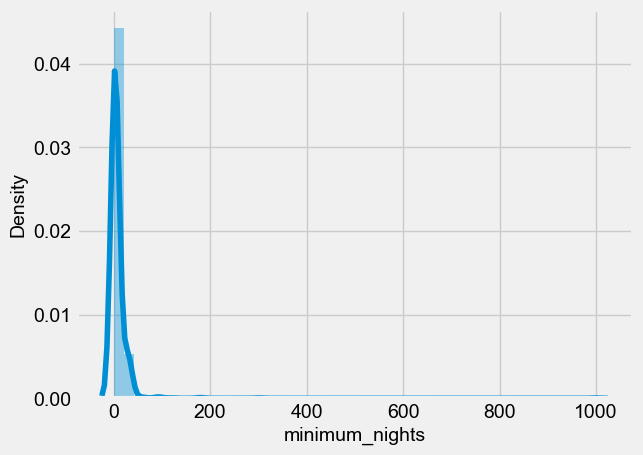

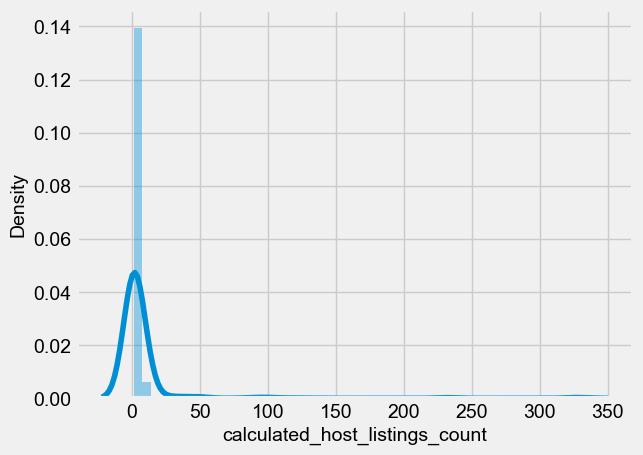

In [22]:
sns.distplot(df["minimum_nights"])
plt.show()
sns.distplot(df["calculated_host_listings_count"])
plt.show()

In [23]:
df.select_dtypes(exclude="object").kurt()

latitude                            0.569437
longitude                           5.291302
price                              38.195972
minimum_nights                    647.496459
number_of_reviews                  17.176632
reviews_per_month                  12.577907
calculated_host_listings_count     73.724482
availability_365                   -0.991214
dtype: float64

<span style='font-family:verdana;color:navy;;font-style:italic'><b>Other than availability_365, other variables not normally distributed </b></span>

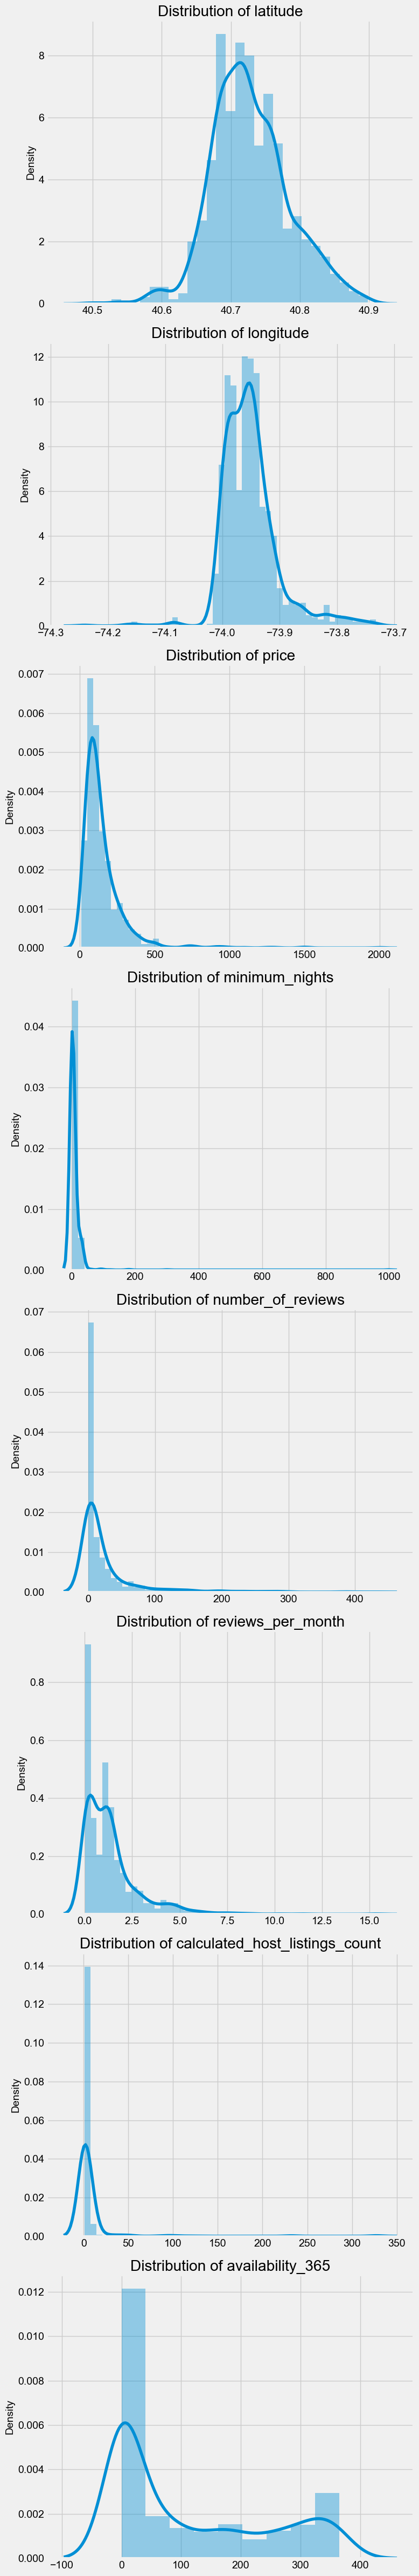

In [24]:
cols = df.select_dtypes(exclude="object").columns

plt.figure(figsize=(8, 6 * len(cols)))  # Adjust the figure size accordingly
for i, col in enumerate(cols, start=1):
    plt.subplot(len(cols), 1, i)
    sns.distplot(df[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel("")
    plt.ylabel("Density")

plt.tight_layout()
plt.show()

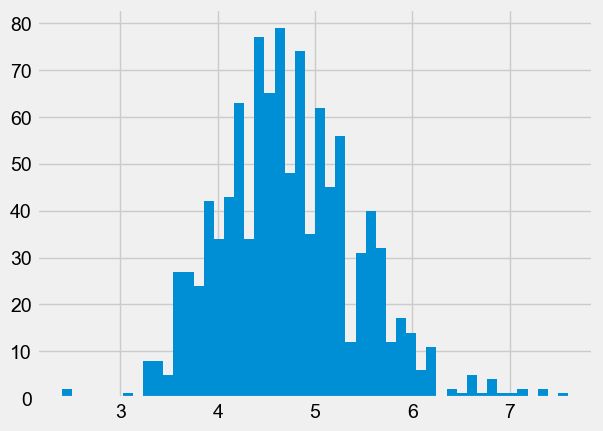

In [25]:
np.log1p(df['price']).hist(bins=50)
plt.show(block=True)

In [26]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [27]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [28]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [29]:
for col in num_cols:
    print(col, check_outlier(df, col))


latitude False
longitude True
minimum_nights True
number_of_reviews True
reviews_per_month True
calculated_host_listings_count True
availability_365 False


In [30]:
for col in num_cols:
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

In [31]:
for col in num_cols:
    print(col, check_outlier(df, col))

latitude False
longitude False
minimum_nights False
number_of_reviews False
reviews_per_month False
calculated_host_listings_count False
availability_365 False


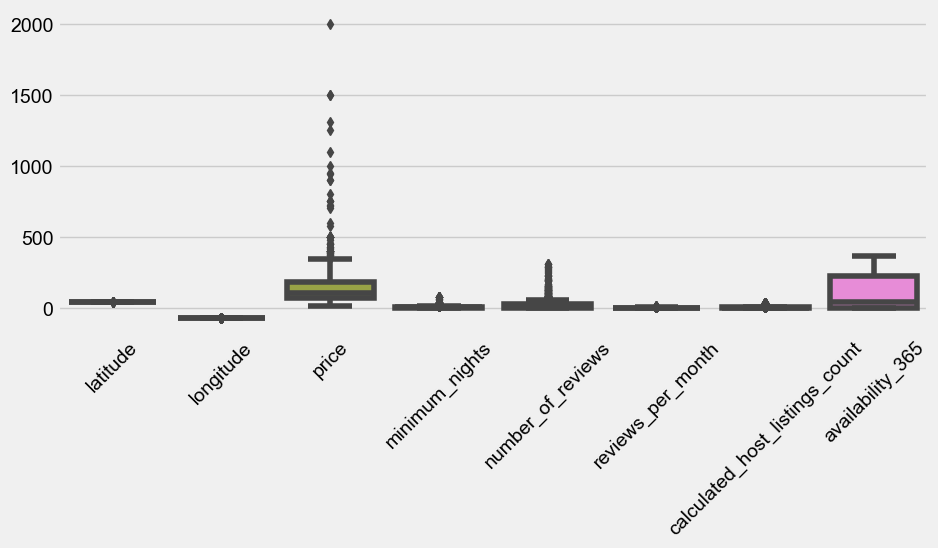

In [32]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df.select_dtypes(exclude="object"))
plt.xticks(rotation=45)
plt.show()

In [33]:
scaler = RobustScaler()

In [34]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [35]:
# Editing of variable names.

df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('[^A-Za-z0-9_]+', '')
df.columns = df.columns.str.lower()

In [36]:
df

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Manhattan,1.070512,-0.111094,Entire home/apt,275,6.75,-0.086957,-0.697337,11.000,0.694972
1,Manhattan,-0.029429,-0.831960,Private room,110,-0.25,-0.217391,-0.779781,0.000,-0.194413
2,Queens,0.071173,1.963832,Private room,55,-0.25,0.826087,0.827873,2.000,-0.024581
3,Queens,0.347375,1.251878,Entire home/apt,96,-0.25,-0.217391,-0.779781,0.000,-0.194413
4,Brooklyn,-0.538421,0.091611,Private room,80,-0.50,-0.260870,0.075148,0.000,-0.172067
...,...,...,...,...,...,...,...,...,...,...
1049,Brooklyn,-0.555397,0.374527,Entire home/apt,135,0.00,6.173913,1.164518,1.000,0.404469
1050,Queens,0.292970,0.957148,Private room,38,6.75,-0.260870,0.379954,33.375,-0.194413
1051,Queens,-0.245243,2.043836,Private room,43,-0.50,0.130435,-0.511838,1.000,1.150838
1052,Brooklyn,-1.146346,0.955904,Private room,65,-0.50,-0.173913,-0.669856,1.000,1.436872


In [37]:
dff = df[["reviews_per_month"]]

In [38]:
rs = RobustScaler()

In [39]:
dff = pd.DataFrame(rs.fit_transform(dff), columns=dff.columns)

In [40]:
from sklearn.impute import KNNImputer
dff = pd.DataFrame(KNNImputer(n_neighbors=5).fit_transform(dff), columns = dff.columns)

In [41]:
dff = pd.DataFrame(rs.inverse_transform(dff), columns=dff.columns)

In [42]:
df[["reviews_per_month"]] = dff

In [43]:
df

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Manhattan,1.070512,-0.111094,Entire home/apt,275,6.75,-0.086957,-0.697337,11.000,0.694972
1,Manhattan,-0.029429,-0.831960,Private room,110,-0.25,-0.217391,-0.779781,0.000,-0.194413
2,Queens,0.071173,1.963832,Private room,55,-0.25,0.826087,0.827873,2.000,-0.024581
3,Queens,0.347375,1.251878,Entire home/apt,96,-0.25,-0.217391,-0.779781,0.000,-0.194413
4,Brooklyn,-0.538421,0.091611,Private room,80,-0.50,-0.260870,0.075148,0.000,-0.172067
...,...,...,...,...,...,...,...,...,...,...
1049,Brooklyn,-0.555397,0.374527,Entire home/apt,135,0.00,6.173913,1.164518,1.000,0.404469
1050,Queens,0.292970,0.957148,Private room,38,6.75,-0.260870,0.379954,33.375,-0.194413
1051,Queens,-0.245243,2.043836,Private room,43,-0.50,0.130435,-0.511838,1.000,1.150838
1052,Brooklyn,-1.146346,0.955904,Private room,65,-0.50,-0.173913,-0.669856,1.000,1.436872


In [44]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [45]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [46]:
df

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,1.070512,-0.111094,275,6.75,-0.086957,-0.697337,11.000,0.694972,0,1,0,0,0,0
1,-0.029429,-0.831960,110,-0.25,-0.217391,-0.779781,0.000,-0.194413,0,1,0,0,1,0
2,0.071173,1.963832,55,-0.25,0.826087,0.827873,2.000,-0.024581,0,0,1,0,1,0
3,0.347375,1.251878,96,-0.25,-0.217391,-0.779781,0.000,-0.194413,0,0,1,0,0,0
4,-0.538421,0.091611,80,-0.50,-0.260870,0.075148,0.000,-0.172067,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,-0.555397,0.374527,135,0.00,6.173913,1.164518,1.000,0.404469,1,0,0,0,0,0
1050,0.292970,0.957148,38,6.75,-0.260870,0.379954,33.375,-0.194413,0,0,1,0,1,0
1051,-0.245243,2.043836,43,-0.50,0.130435,-0.511838,1.000,1.150838,0,0,1,0,1,0
1052,-1.146346,0.955904,65,-0.50,-0.173913,-0.669856,1.000,1.436872,1,0,0,0,1,0


### 4.	Summarize relationships among variables (5 marks)               
a.	Plot correlation plots. Which are the variables most correlated with Target? Which independent variables are correlated among themselves? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?




<Axes: >

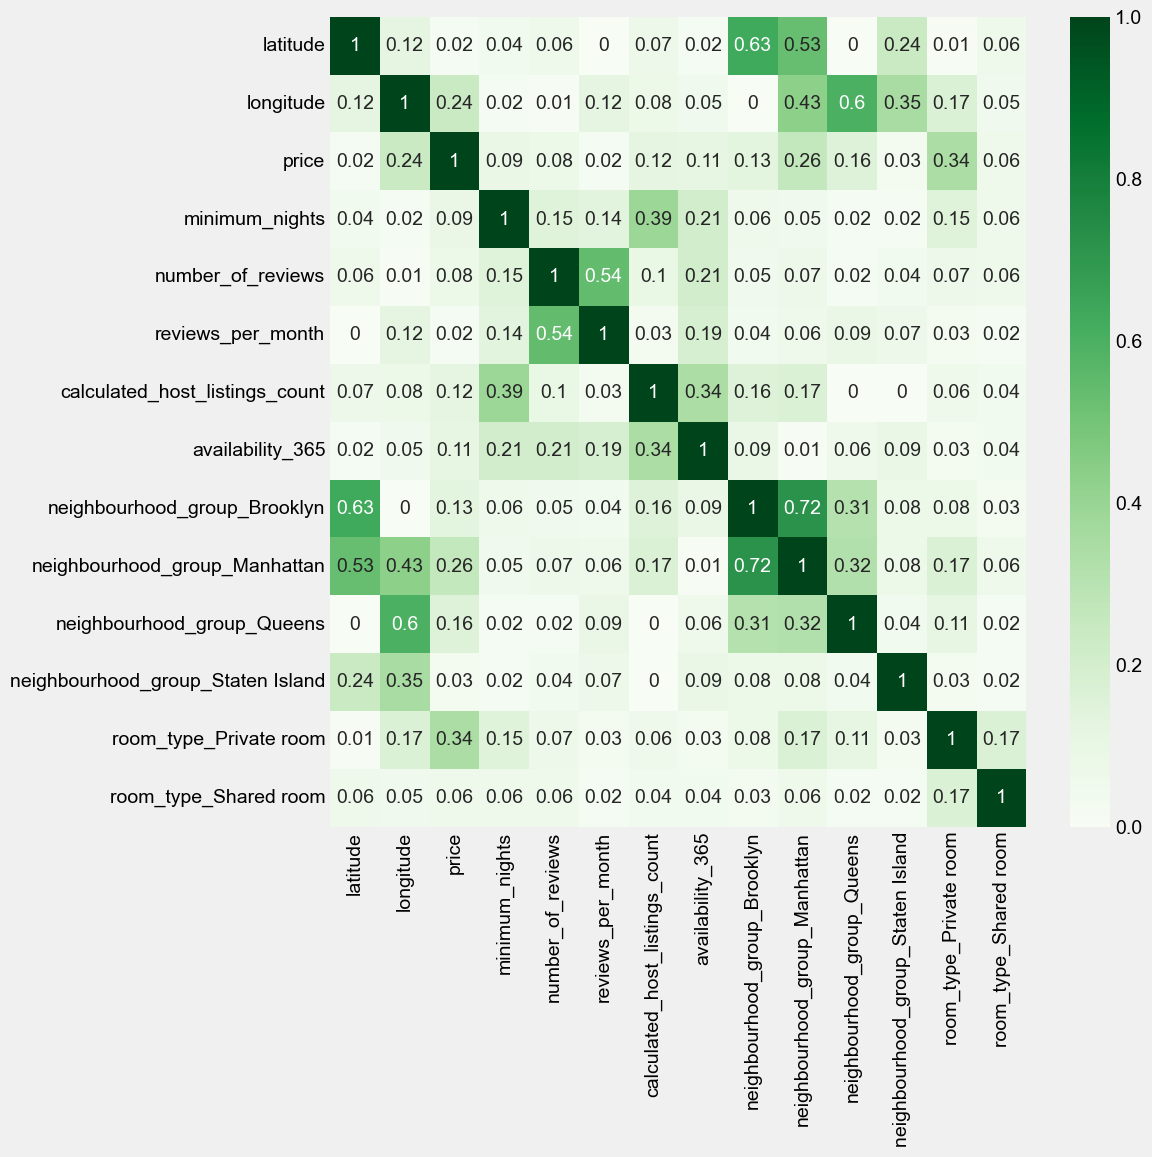

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().abs().round(2),cmap="Greens",annot=True)

<span style='font-family:verdana;color:navy;;font-style:italic'><b>Few variables has considerable correlation</b></span>

###  5.	Fit a base model. Please write your key observations (5 marks)

a. Fit the Linear Regression Model

b. What is the overall R2? Please comment on whether it is good or not.

c. Which variables are significant?

d. Calculate MSE, RMSE, MAE, MAPE.


In [48]:
target = 'price'

# Splitting data into features and target variable
X = df.drop(target,axis=1)
y = df[target]

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print(f"Overall R2 Score: {r2}")

Overall R2 Score: 0.31617294599587653


<span style='font-family:verdana;color:navy;;font-style:italic'><b>R2 Score is poor as the values are even less than 0.5</b></span>

In [50]:
# Extracting coefficients and corresponding feature names
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
significant_variables = coefficients[coefficients['Coefficient'] != 0]
print("Significant Variables:")
print(significant_variables)

Significant Variables:
                              Feature  Coefficient
0                            latitude   -23.919632
1                           longitude   -29.423789
2                      minimum_nights    -1.598456
3                   number_of_reviews    -8.738351
4                   reviews_per_month     7.360093
5      calculated_host_listings_count    -0.104866
6                    availability_365    38.231136
7        neighbourhood_group_Brooklyn   -66.517389
8       neighbourhood_group_Manhattan    -4.122762
9          neighbourhood_group_Queens   -48.093199
10  neighbourhood_group_Staten Island  -233.914700
11             room_type_Private room   -90.993392
12              room_type_Shared room   -94.842458


In [51]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = (abs((y_test - y_pred) / y_test)).mean() * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape}")



Mean Squared Error (MSE): 12325.31110909169
Root Mean Squared Error (RMSE): 111.0194177119106
Mean Absolute Error (MAE): 61.301609840548394
Mean Absolute Percentage Error (MAPE): 46.48590295285122


###6. Perform feature engineering using any of the listed techniques: Forward feature selection, backward elimination and recursive feature elimination and use the features to improvise the model and compare the results with the base model. (5 marks)

In [52]:
df.shape

(1054, 14)

In [53]:
from sklearn.feature_selection import RFE

# Using the same base model with all features
model = LinearRegression()

# Initialize RFE
rfe = RFE(model, n_features_to_select=7)  # Select 3 most important features

# Fit RFE to the data
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected Features with RFE:")
print(selected_features)


Selected Features with RFE:
Index(['longitude', 'availability_365', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')


In [54]:
# Training with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Fit a new model using selected features
model.fit(X_train_selected, y_train)

# Predict on the test set
y_pred_selected = model.predict(X_test_selected)

# Calculate R2 score with selected features
r2_selected = r2_score(y_test, y_pred_selected)
print(f"\nOverall R2 Score with Selected Features: {r2_selected}")

# Calculate MSE, RMSE, MAE, MAPE with selected features
mse_selected = mean_squared_error(y_test, y_pred_selected)
rmse_selected = mean_squared_error(y_test, y_pred_selected, squared=False)
mae_selected = mean_absolute_error(y_test, y_pred_selected)
mape_selected = (abs((y_test - y_pred_selected) / y_test)).mean() * 100

# Compare metrics between base model and model with selected features
print("\nComparison of Metrics:")
print(f"MSE Base Model: {mse}, MSE with Selected Features: {mse_selected}")
print(f"RMSE Base Model: {rmse}, RMSE with Selected Features: {rmse_selected}")
print(f"MAE Base Model: {mae}, MAE with Selected Features: {mae_selected}")
print(f"MAPE Base Model: {mape}, MAPE with Selected Features: {mape_selected}")



Overall R2 Score with Selected Features: 0.30458248680528754

Comparison of Metrics:
MSE Base Model: 12325.31110909169, MSE with Selected Features: 12534.217753812385
RMSE Base Model: 111.0194177119106, RMSE with Selected Features: 111.9563207407799
MAE Base Model: 61.301609840548394, MAE with Selected Features: 63.34137112582232
MAPE Base Model: 46.48590295285122, MAPE with Selected Features: 49.84641761737398


###7. The prediction model output reliability can be improved using regularization techniques and parameter tuning. Perform regularization techniques and compare the results with the base model. (5 marks)

In [55]:
# Initialize Ridge regression
ridge_model = Ridge()

# Set up parameter grid for tuning alpha (regularization strength)
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform grid search for best alpha value
ridge_grid = GridSearchCV(ridge_model, param_grid, cv=5)
ridge_grid.fit(X_train, y_train)

# Get best alpha
best_alpha_ridge = ridge_grid.best_params_['alpha']

# Train Ridge model with best alpha
ridge_model_best = Ridge(alpha=best_alpha_ridge)
ridge_model_best.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_model_best.predict(X_test)

# Calculate R2 score for Ridge regression
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression R2 Score: {r2_ridge}")

Ridge Regression R2 Score: 0.3162865433914055


In [56]:
# Initialize Lasso regression
lasso_model = Lasso()

# Perform grid search for best alpha value
lasso_grid = GridSearchCV(lasso_model, param_grid, cv=5)
lasso_grid.fit(X_train, y_train)

# Get best alpha
best_alpha_lasso = lasso_grid.best_params_['alpha']

# Train Lasso model with best alpha
lasso_model_best = Lasso(alpha=best_alpha_lasso)
lasso_model_best.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_model_best.predict(X_test)

# Calculate R2 score for Lasso regression
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression R2 Score: {r2_lasso}")

Lasso Regression R2 Score: 0.3162702648573873


In [57]:
R2_data = {"R2_Scores":{"Base_Model":r2,"RFE_Features":r2_selected,"Ridge_Reg":r2_ridge,"Lasso_Reg":r2_lasso}}

In [58]:
R2_Scores = pd.DataFrame(R2_data)

In [59]:
R2_Scores=R2_Scores.sort_values(by="R2_Scores",ascending=False)

In [60]:
R2_Scores

,R2_Scores
Ridge_Reg,0.316287
Lasso_Reg,0.316270
Base_Model,0.316173
RFE_Features,0.304582


<span style='font-family:verdana;color:navy;;font-style:italic'><b>R2 Scores is better after Regularization than Base Model</b></span>